# Data Science Course Final Project: *Diabetic Prediction*

## 1. Problem Statement

In 2018, 34.2 million Americans, had diabetes (10.5% of the population). According to statistics from the American Diabetes Association, of the 34.2 million adults with diabetes, 26.8 million were diagnosed, and 7.3 million were undiagnosed. An additional 84.1 million adults in the U.S. have prediabetes—blood sugar levels that are higher than normal, but not yet high enough to be classified as diabetes.  

To make matters worse, undiagnosed diabetes can lead to several other complications throughout the body (e.g., kidney and eye diseases), and recurrent illness. 

For my final project, I would like to build a model that  **predicts if a patient has diabeties.** With the use of machine learning we can predict if a patient is likely to have diabties based on several factors such as age, blood pressure, glucose etc, and help patients get treatment before their health is dire. 

## 1.1 Data Source
The data used for my final project was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database.

## 2. Approach Overview

### 2.1 Target Variables
Our target variable is Outcome. Outcome in this dataset tells us if or if not a patient has diabeties.


### 2.2 Feature Variables
The subset of variables that I am using in my model include:
- Glucose
- BMI
- Insulin
- Diabetes Pedigree Function
- Age
- Pregnancies
- Skin Thickness
- Blood Pressure 



### 2.3 Model Approach

As we'll see below, our distribution between positive and negative outcomes is imbalanced, which is why I want to make sure prediction accuracy is not our only evaluation metric. 

Because we're dealing with health it is important we **avoid false negatives** so we can ensure that those who need medical care are not being mis-diagnosed. Even though I am interested in recall over precision, we'll want to keep a fairly healthy balance between the two, which is why I will be calculating 𝐹𝛽 (𝛽=2)for each model itteration alongside prediction accuracy.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import fbeta_score, make_scorer
import matplotlib.pyplot as plt

In [3]:
diabetic=pd.read_csv("Desktop/DataScience/diabetes2.csv")

In [2]:
cd

/Users/nishthachhabra


### 3.1 Testing for Missing Values

In [55]:
#lets calculate if there are any missing values
diabetic.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [57]:
diabetic.shape

(768, 9)

### 3.2 Summary of Dataset

In [58]:
#Top 15 rows of my new dataset
diabetic.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [31]:
#Summary statsitics about my numerical variables
diabetic.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


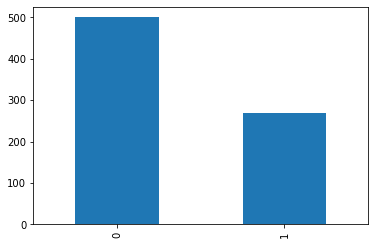

In [32]:
#distribution of our outcome variable seems skewed towards Not Diabetic
diabetic.loc[:, "Outcome"].value_counts().plot.bar()

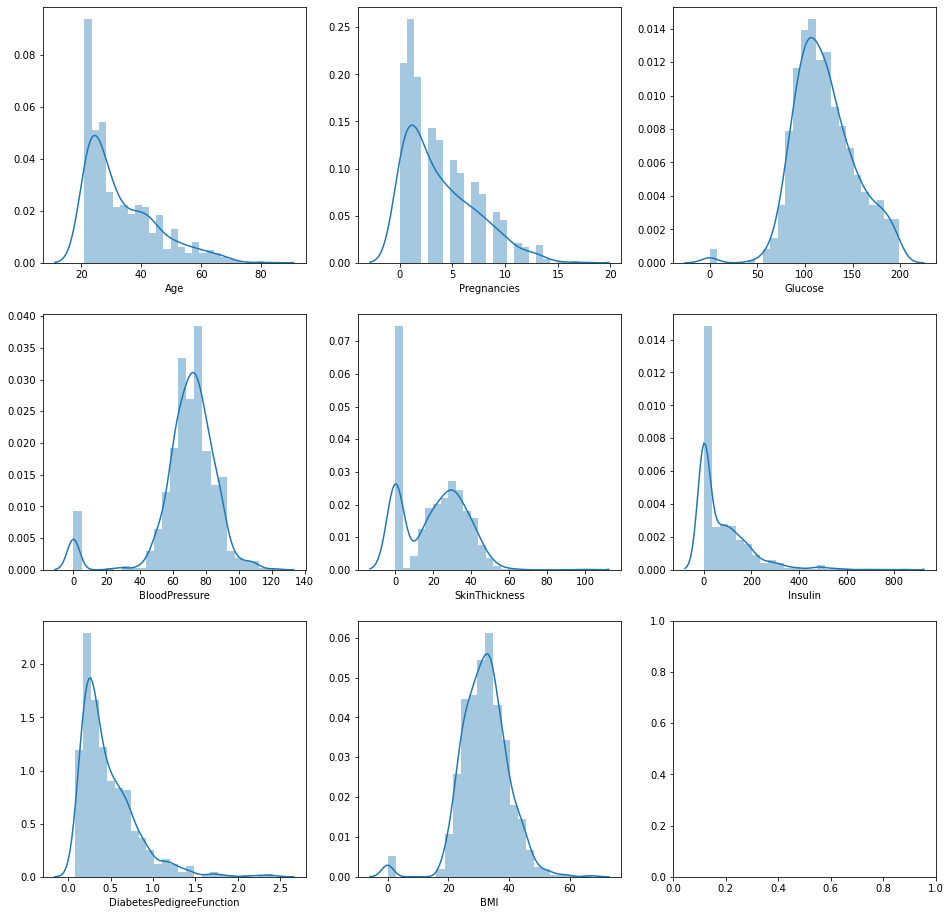

In [4]:
#distribution for our feature columns

fig, ax = plt.subplots(3,3, figsize=(16,16))
sns.distplot(diabetic.Age, bins = 25,ax=ax[0,0]) 
sns.distplot(diabetic.Pregnancies, bins = 25, ax=ax[0,1]) 
sns.distplot(diabetic.Glucose, bins = 25, ax=ax[0,2]) 
sns.distplot(diabetic.BloodPressure, bins = 25, ax=ax[1,0]) 
sns.distplot(diabetic.SkinThickness, bins = 25, ax=ax[1,1])
sns.distplot(diabetic.Insulin, bins = 25, ax=ax[1,2])
sns.distplot(diabetic.DiabetesPedigreeFunction, bins = 25, ax=ax[2,0]) 
sns.distplot(diabetic.BMI, bins = 25, ax=ax[2,1]) 

### 3.5 Understanding Correlation

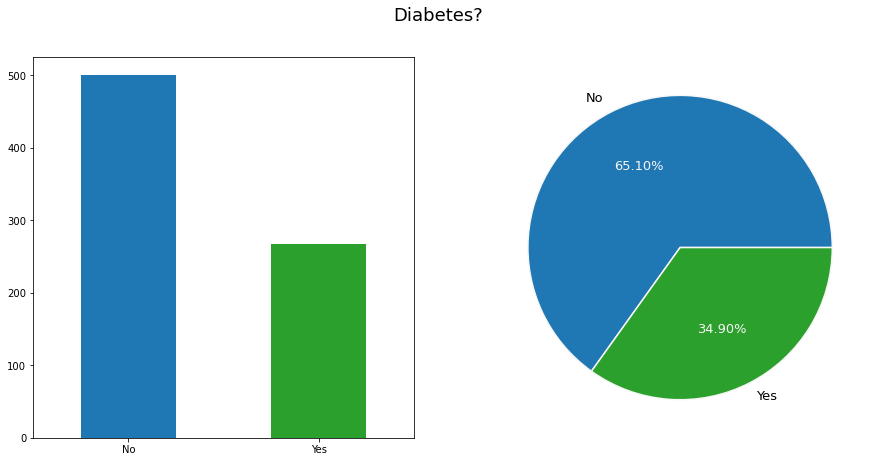

In [5]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Diabetes?", fontsize = 18.)
_ = diabetic.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = diabetic.Outcome.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

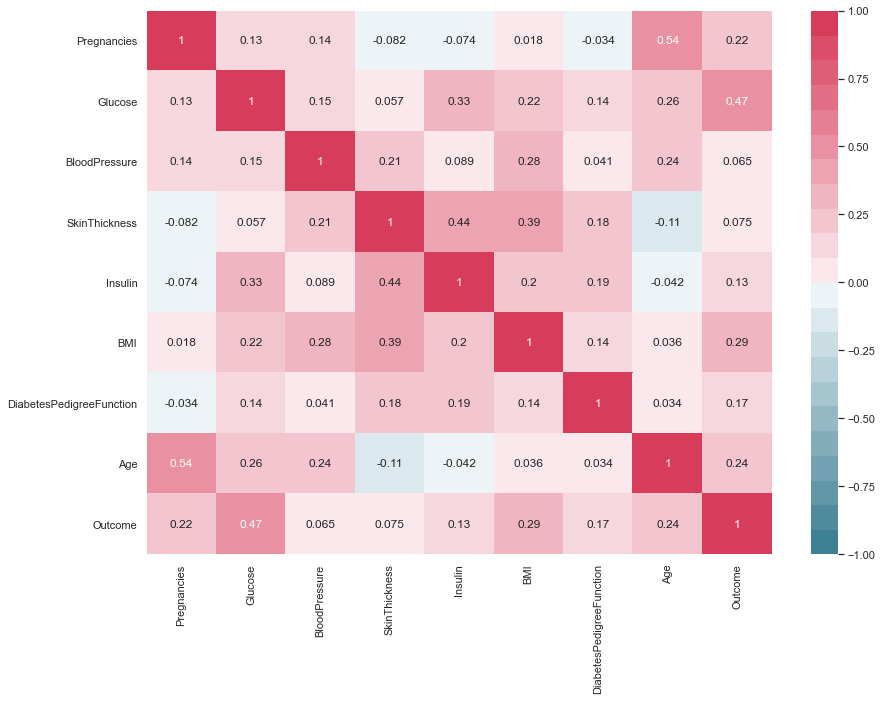

In [34]:
#From the correlation heatmap, we can see that Outcome is most corelated to BMI, Glucose, Age, and Prenancies
sns.set(font_scale=1)
plt.figure(figsize=(14, 10))
ax = sns.heatmap(
    diabetic.corr(),
    vmin=-1,
    vmax=1,
    cmap=sns.diverging_palette(h_neg=220, h_pos=5, n=22),
    annot=True
)

### 3.5 Filling in zero values

In [35]:
#Lots of our feature columns have values equal to zero. We will want to fill these values appropriately
#will use median for columns where min value is zero. 

In [59]:
#Not worried about pregnancies since it's very normal to have never been pregnant 
#will update zero values for BMI, Blood Pressure, Skin Thickness, Glucose, and Insulin
diabetic['Glucose'].replace(0,diabetic['Glucose'].median(),inplace=True)
diabetic['BloodPressure'].replace(0,diabetic['BloodPressure'].median(),inplace=True)
diabetic['SkinThickness'].replace(0,diabetic['SkinThickness'].median(),inplace=True)
diabetic['BMI'].replace(0,diabetic['BMI'].median(),inplace=True)
diabetic['Insulin'].replace(0,diabetic['Insulin'].median(),inplace=True)

In [37]:
#re-evaluating summary statistics. We can see that pregnancies is now the only feature with a minimum value of zero
diabetic.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 4. Model Building 

### 4.1 Logistic Regression Model

In [6]:
#first pass at logistic regression model

X=diabetic.drop('Outcome',axis=1)
y=diabetic['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y)

lr1=LogisticRegression(max_iter=10000)
lr1.fit(X_train,y_train)

#calculating train test score to get a general idea of how our model is fitting and overall prediction accuracy

print("LR1 Train Accuracy:",lr1.score(X_train, y_train))
print("LR1 Test Accuracy:",lr1.score(X_test, y_test))

LR1 Train Accuracy: 0.7795138888888888
LR1 Test Accuracy: 0.7864583333333334


In [9]:
y_train.value_counts()

0    374
1    202
Name: Outcome, dtype: int64

In [11]:
y_test.value_counts()

0    126
1     66
Name: Outcome, dtype: int64

In [141]:
#since we want to minimize false negatives, and are dealing with class imbalance lets calculate F2 and the rest of our classification report
y_pred_test = lr1.predict(X_test)
Recall_LR=metrics.recall_score(y_test, y_pred_test)
Precision_LR=metrics.precision_score(y_test, y_pred_test)  
fbeta_2_LR=metrics.fbeta_score(y_test,y_pred_test, beta=2)

print("Fbeta_2 LR :", fbeta_2_LR)
print("Recall LR :",Recall_LR)
print(f"Precision LR :{(Precision_LR)} \n")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, lr1.predict(X_test))}\n")

Fbeta_2 LR : 0.5612244897959183
Recall LR : 0.532258064516129
Precision LR :0.717391304347826 

Confusion Matrix: 
 [[117  13]
 [ 29  33]]



### 4.2 Logistic Regression Model Iteration 2

In [118]:
#However overall performance seems low for our F2_score in iteration 1

In [142]:
#lets find the probability threshold that optimizes our f2 score for this model 

y_pred_lr = lr1.predict_proba(X_test)[:, 1]
thresholds = sorted(set(y_pred_lr))

f2_scores = []
for threshold in thresholds:
    y_pred_thresh = y_pred_lr > threshold
    f2_scores.append(metrics.fbeta_score(y_test, y_pred_thresh, beta=2))

In [143]:
#lets put scores into a dataframe and get the best score
results = pd.DataFrame({"threshold": thresholds, "f2": f2_scores})
best_threshold = results.loc[results.loc[:, "f2"].idxmax(), "threshold"]
best_threshold

0.13470994086810112

In [144]:
#Calculate the test-set accuracy, precision, recall, and  𝐹2  score for this model.
y_pred_thresh = y_pred_lr > best_threshold

In [145]:
fbeta_2_LR2=metrics.fbeta_score(y_test, y_pred_thresh, beta=2)
Acurracy_lR2=metrics.accuracy_score(y_test, y_pred_thresh)

print("Fbeta_2_LR2 :", metrics.fbeta_score(y_test, y_pred_thresh, beta=2))
print("Accuracy LR2 :", Acurracy_lR2)
print("Recall LR2 :",metrics.recall_score(y_test, y_pred_thresh))
print("Precision LR2 :", metrics.precision_score(y_test, y_pred_thresh))
cm2 = metrics.confusion_matrix(y_test, y_pred_thresh)
pd.DataFrame(cm2, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])

Fbeta_2_LR2 : 0.7804232804232804
Accuracy LR2 : 0.6145833333333334
Recall LR2 : 0.9516129032258065
Precision LR2 : 0.45384615384615384


,Predicted 0,Predicted 1
Actual 0,59,71
Actual 1,3,59


We were able to improve F2 signifigantly by lowering our probability threshold. Overall prediction accuracy performed signifigantly worse. 

 <h3>4.3 Decision Tree Iteration 1</h3>

In [147]:
#first pass at decision tree model. 
X=diabetic.drop('Outcome',axis=1)
y=diabetic['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)


DT1_Train= dtc.score(X_train, y_train)
DT1_Test= dtc.score(X_test, y_test)

#lets see how this model is fitting and get an idea of it's overall predictive accuracy. 
print("DT Iteration 1 Train:", DT1_Train)
print("DT Iteration 1 Test:",DT1_Test)

DT Iteration 1 Train: 1.0
DT Iteration 1 Test: 0.75


In [148]:
#Looks like we are seeing a lot of variance with our accuracy scores. 
#We also want to be cognizant of false negatives, lets Calculate the test precision, recall, and  𝐹2  score for this model.

y_pred = dtc.predict(X_test)
DT1_F2_Test=metrics.fbeta_score(y_test, y_pred,beta=2)
Recall_DT=metrics.recall_score(y_test,y_pred)
Precision_DT=metrics.precision_score(y_test,y_pred)

print("Fbeta_2 DT :", fbeta_2_DT)
print("Recall DT :",Recall_DT)
print(f"Precision DT :{(Precision_DT)} \n")
cm3 = metrics.confusion_matrix(y_test, y_pred)
pd.DataFrame(cm3, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])


Fbeta_2 DT : 0.2459016393442623
Recall DT : 0.5454545454545454
Precision DT :0.6666666666666666 



,Predicted 0,Predicted 1
Actual 0,108,18
Actual 1,30,36


In [114]:
#this model is seeing very low F2 score. Lets see if we can improve

<h3>4.4 Decision Tree Iteration 2</h3>

In [117]:
#We can determine the best max depth & min samples to improve F2 using using cross validation. 

#F2 was very low on our first iteration. Lets adjust the scorer to f2 using make scorer 

ftwo_scorer = make_scorer(fbeta_score, beta=2)

grid = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={"max_depth": range(2, 30,2),"min_samples_leaf": range(1,30,2)},
    cv=KFold(20,shuffle=True),
    scoring = ftwo_scorer,
)
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=20, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 30, 2),
                         'min_samples_leaf': range(1, 30, 2)},
             scoring=make_scorer(fbeta_score, beta=2))

In [119]:
grid.best_score_, grid.best_params_

(0.6559503988887594, {'max_depth': 22, 'min_samples_leaf': 19})

In [122]:
#An improvement from our first iteration, but it doesn't look like the "best score" for fbeta2 is very high. 
#Lets put these best params back in the model to see how other metrics do 

X=diabetic.drop('Outcome',axis=1)
y=diabetic['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y)
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier(max_depth=22,min_samples_leaf=19)
dtc1.fit(X_train, y_train)

DT_Train_2=dtc1.score(X_train, y_train)
DT_Test_2=dtc1.score(X_test, y_test)

#similar to our other models, lets first evaluate prediction accuracy
print("DT2 Train Accuracy:",DT_Train_2)
print("DT2 Test Accuracy:",DT_Test_2)


DT2 Train Accuracy: 0.8177083333333334
DT2 Test Accuracy: 0.8125


In [123]:
#looks like we are seeing lower variance and a better test score
#lets calculate precision, recall, and f2 as well

y_pred_test = dtc1.predict(X_test)
fbeta_2_DT2=metrics.fbeta_score(y_test, y_pred_test, beta=2)
Recall_DT2=metrics.recall_score(y_test, y_pred_test)
Precision_DT2=metrics.precision_score(y_test, y_pred_test)  

print("Fbeta_2 DT2 :", fbeta_2_DT2)
print("Recall DT2 :",Recall_DT2)
print(f"Precision DT2 :{(Precision_DT2)} \n")

cm4 = metrics.confusion_matrix(y_test, y_pred_test)
pd.DataFrame(cm4, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])

Fbeta_2 DT2 : 0.7476635514018691
Recall DT2 : 0.7619047619047619
Precision DT2 :0.6956521739130435 



,Predicted 0,Predicted 1
Actual 0,108,21
Actual 1,15,48


In [124]:
#Even though it's not as good as I was hoping - iteration 2 for decision trees performed way better than iteration 1! 

 <h3>4.5 Random Forest Iteration 1</h3>

In [125]:
X=diabetic.drop('Outcome',axis=1)
y=diabetic['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y)
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators=100)
rfr.fit(X_train, y_train)
y_pred_test_rfr = rfr.predict(X_test)

RFIteration1Train=rfr.score(X_train, y_train)
RFIteration1Test=rfr.score(X_test, y_test)

#lets predict overall accuracy on the train and test data 
print("RF Accuracy Train:", RFIteration1Train)
print("RF Accuracy Test:",RFIteration1Test)

RF Accuracy Train: 1.0
RF Accuracy Test: 0.7604166666666666


In [126]:
#similar the other models, we want to be cognizant of false negatives, lets calculate our other metrics for this 
fbeta_2_RF=metrics.fbeta_score(y_test, y_pred_test_rfr, beta=2)
Recall_RF=metrics.recall_score(y_test, y_pred_test_rfr)
Precision_RF=metrics.precision_score(y_test, y_pred_test_rfr)  

print("Fbeta_2 DT :", fbeta_2_RF)
print("Recall DT :",Recall_RF)
print(f"Precision DT :{(Precision_RF)} \n")


cm5 = metrics.confusion_matrix(y_test, y_pred_test_rfr)
pd.DataFrame(cm5, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])

Fbeta_2 DT : 0.6065088757396451
Recall DT : 0.5857142857142857
Precision DT :0.7068965517241379 



,Predicted 0,Predicted 1
Actual 0,105,17
Actual 1,29,41


In [ ]:
#for a first pass this model didn't too bad. Noticing a fairly high variance for prediction accuracy though. 

<h3>4.6 Random Forest Iteration 2</h3>

In [127]:
#lets tune the random forest by adding some additional parameters. 


X=diabetic.drop('Outcome',axis=1)
y=diabetic['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,)
from sklearn.ensemble import RandomForestClassifier

rfr1 = RandomForestClassifier(max_depth=20,n_estimators=150)
rfr1.fit(X_train, y_train)
y_pred_test_rfr1 = rfr1.predict(X_test)
y_pred_train_rfr1 = rfr1.predict(X_train)

RFIteration2Train=rfr1.score(X_train, y_train)
RFIteration2Test=rfr1.score(X_test, y_test)
RFIteraration2_Fbeta2=metrics.fbeta_score(y_test, y_pred_test_rfr1,beta=2)

print("RF Iteration 2 Train:",RFIteration2Train)
print("RF Iteration 2 Test:",RFIteration2Test) 

RF Iteration 2 Train: 1.0
RF Iteration 2 Test: 0.8072916666666666


In [128]:
#lets take a look at our confusion matrix. 

fbeta_2_RF2=metrics.fbeta_score(y_test, y_pred_test_rfr1, beta=2)
Recall_RF2=metrics.recall_score(y_test, y_pred_test_rfr1)
Precision_RF2=metrics.precision_score(y_test, y_pred_test_rfr1)  

print("Fbeta_2 RF :", fbeta_2_RF2)
print("Recall RF :",Recall_RF2)
print(f"Precision RF :{(Precision_RF2)} \n")


cm6 = metrics.confusion_matrix(y_test, y_pred_test_rfr1)
pd.DataFrame(cm6, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])

Fbeta_2 RF : 0.696969696969697
Recall RF : 0.6865671641791045
Precision RF :0.7419354838709677 



,Predicted 0,Predicted 1
Actual 0,109,16
Actual 1,21,46


## 6. Model Evaluation

A little disappointed with the overall performance of this model, as I was not able to get either accuracy or F2 scores above 80%.That being said, I was able to improve the F2 score for each model. Similarly, our accuracy scores for many of the models are showing low variance and improved for 2 out of the 3 models

Lowering the probabilty threshold on our Logistic Regession model had a big impact on improving our F2 score but lowered our accuracy score, while using cross validation on our decision tree helped us tune the model to get the best F2 score, without having an impact on overal prediction accuracy. 

However, Random Forest was a bit more difficult to tune. Both iterations of RF seem to have high variance  and I wasn't able improve it as much as I would've liked using the basic tuning features we talked about in class. 


Overall the logistic regression model has the best F2 score. However, if we are looking for a pretty good F2 score but also strong overall prediction accuracy, I would deter to Decision Tree Model Iteration 2. 

In [150]:
#Create a results summary table of the top performing LR, DT, and RF models
model_type = ['DecisionTree', 'RandomForest', 'LogisticRegression']
Fbeta_2 = [DT2_Fbeta2, fbeta_2_RF2,fbeta_2_LR2]
Test_Accuracy = [DT_Test_2,RFIteration2Test, Acurracy_lR2]

results_df = pd.DataFrame({'model_type':model_type, 'Fbeta_2':Fbeta_2, 'Test_Accuracy':Test_Accuracy})
results_df

,model_type,Fbeta_2,Test_Accuracy
0,DecisionTree,0.747664,0.812500
1,RandomForest,0.696970,0.807292
2,LogisticRegression,0.780423,0.614583
